Este Notebook está aún incompleto, pero pueden irlo revisando para darse una idea de los proyectos que hay, lo que hemos visto y lo que falta por verse. 

# Graficos
En todos los casos usaremos gráficos, para eso hay que cargar la librería adecuada: PyPlot

In [3]:
using PyPlot

# Proyecto del gusano

El problema a resolverse es el siguiente: Encontrar el objeto 2D de menor área, tal que dentro se pueda meter cualquier curva continua de longitud 1. 

El primer ejercicio es encontrar el Convex hull de un conjunto de puntos en el plano. Creo que ya todos entendieron de qué trata el problema. 

A bajo pueden ver como encontrar los primeros 4 puntos. Para el resto, el hint es usar el producto punto. Hay que revisar en qué casos $(\vec{x_1}-\vec{x_i}) \cdot \vec{n} <0 $ donde $\vec{n}$ es el vector normal a $\vec{x_1}-\vec{x_2}$, con $\vec{x_1}$ y $\vec{x_2}$ dos puntos vecinos de los 4 puntos iniciales. 

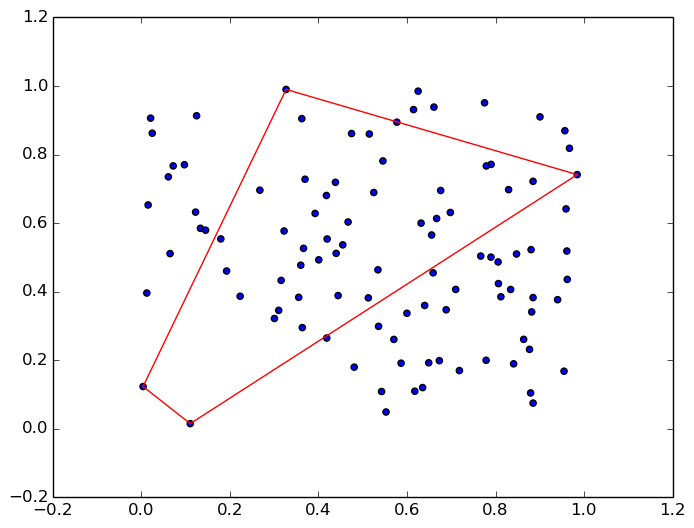

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8d4703d610>

In [4]:
x=rand(100)
y=rand(100)
i1=indmax(x)
i2=indmax(y)
i3=indmin(x)
i4= indmin(y)
x_1=[x[1],y[1]]
x_2=[x[2],y[2]]
x_3=[x[3],y[3]]
x_4=[x[4],y[4]]
scatter(x,y)
plot([x[i1],x[i2],x[i3],x[i4],x[i1]],[y[i1],y[i2],y[i3],y[i4],y[i1]],c="red")

# Perdido en el bosque

El problema consiste en encontrar la mejor estrategia para salir de un bosque del que se conoce la forma, pero no se sabe ni la orientación (dónde está el norte), ni la posición en la que uno se encuentra. 

El primer problema consiste en encontrar el tiempo promedio que tarda un "perdido" en salir de un bosque cuadrado de lado L, si este se mueve simplemente en linea recta, a velocidad constante. 

El primer paso de este ejercicio consiste en calcular el tiempo de salida dadas la posición y la dirección de movimiento. La solución a este primer paso, es la siguiente: 

In [5]:
function tiempo_de_salida_cuadrado(x,θ,L=1)
    v = [cos(θ), sin(θ)]
    t=zeros(4)
    t[1] = (0.5*L-x[1])/v[1]   #Intersección con x=0.5*L
    t[2] = (-0.5*L-x[1])/v[1]  #Intersección con x=-0.5*L
    t[3] = (0.5*L-x[2])/v[2]  #Intersección con y=0.5*L
    t[4] = (-0.5*L-x[2])/v[2]  #Intersección con y=-0.5*L
    for i = 1:4
        if t[i] < 0
            t[i] = Inf   # si es negativo el tiempo, lo descartamos del cálculo del mínimo. 
        end
    end
    t_min = minimum(t)
    return t_min
end

tiempo_de_salida_cuadrado (generic function with 2 methods)

In [6]:
x1,θ1 = rand(2),2*π*rand()
t = tiempo_de_salida_cuadrado(x1,θ1)
x1+[cos(θ1), sin(θ1)]*t 
#comprobamos que el resultado sea de la forma (0.5,y), (-0.5,y), (x,0.5) ó (x,-0.5), con -0.5<x<0.5 y -0.5<y<0.5 

2-element Array{Float64,1}:
 0.5     
 0.316359

Para verificar que la función calcula correctamente el valor, podemos hacer una gráfica con unos 3 puntos y ver si aproximádamente corresponde la distancia: 

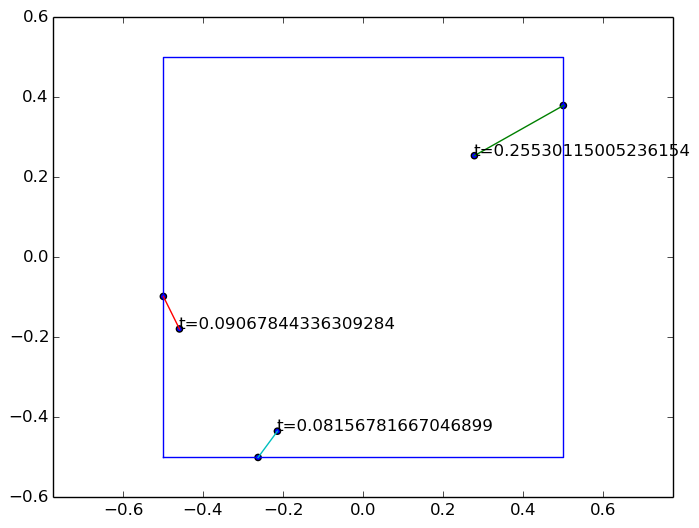

In [7]:
plot([-0.5,-0.5,0.5,0.5,-0.5],[-0.5,0.5,0.5,-0.5,-0.5]) #cuadrado
axis("equal")
for i in 1:3
    x = rand(2)-[0.5,0.5] #tres condiciones iniciales en el cuadrado de lado 1, centrado en 0. 
    θ = 2*π*rand() #3 condiciones iniciales de dirección de movimiento. 
    t = tiempo_de_salida_cuadrado(x,θ)
    v = [cos(θ), sin(θ)]
    xf = x + v*t 
    plot([x[1],xf[1]],[x[2],xf[2]])
    text([x[1]],[x[2]], "t=$t")
    scatter([x[1],xf[1]],[x[2],xf[2]])
end

#Tráfico por cafres

El primero ejercicio consiste en poner 2 autos en un circuito de un solo carril y encontrar en cuanto tiempo se encuentran e igualan sus velocidades. 

Para hacer el ejercicio el primer paso es tener un auto de un determiando tamaño en una carretera con condiciones periódicas a la frontera. Después calcular el tiempo que tarda un auto en alcanzar a otro. Finalmente, calcular como se frena cada auto. 

Pondré aquí el primer paso: 



In [8]:
function Posicion_auto(v,t,x_inicial=0,Tamaño=1,Carretera=100)
    posicion = x_inicial + v*t
    posicion_atras = posicion - Tamaño/2
    posicion_frente = posicion + Tamaño/2
    return [mod(posicion_atras, Carretera), mod(posicion_frente, Carretera)]
end

Posicion_auto (generic function with 4 methods)

In [9]:
Posicion_auto(20,5, 0, 5, 1000)

2-element Array{Float64,1}:
  97.5
 102.5

Para ver que la función funciona como quisiéramos, abajo pongo una simulación en tiempo real (esto no necesitan entender como funciona). Se tiene que correr el siguiente código 2 veces para poder ver la animación en tiempo real del código de la última celda. 

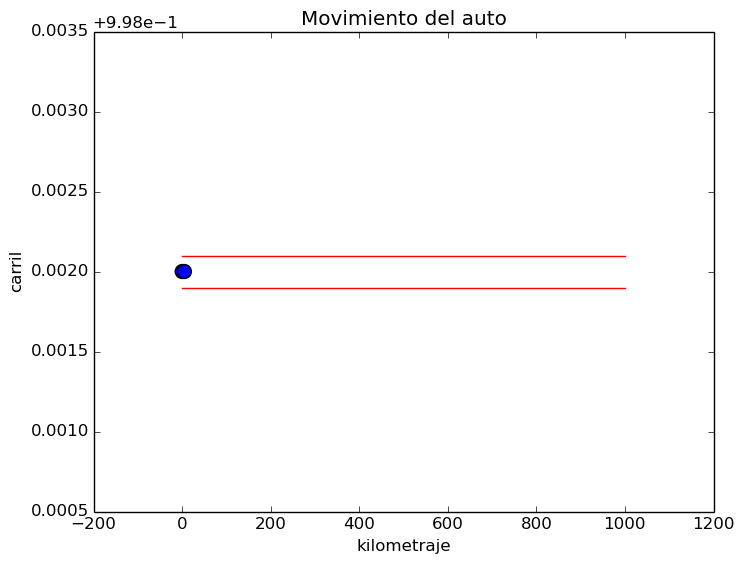

In [17]:
using Reactive,Interact,PyPlot
myfig = figure()

function myplot(data)
        withfig(myfig) do
        posicion=data[1]
        carretera=data[2]
        n=length(posicion)
        ylabel("carril")
        xlabel("kilometraje")
        title("Movimiento del auto")
        scatter(carretera, ones(2), s=.0, c="red")
        plot(carretera, ones(2).+0.0001, color="red")
        plot(carretera, ones(2).-0.0001, color="red")
        scatter(posicion, ones(n), s=100, c="blue")

        end
end
myinput=Signal(Array[[0,5],[0,1000]])
map(myplot, myinput)

In [18]:
for i=1:100
    push!(myinput,Array[Posicion_auto(20,i*1.3, 0, 5, 1000), [0,1000]])
end

# Modelo de Ising (materiales de alto spin)

El modelo de Ising es un modelo discreto, donde todas las operaciones se llevan sobre una lattice. En los vértices de la lattice se encuentran los átomos (o moléculas), los cuales pueden tener spin positivo, o negativo ($\sigma_i = 1$ ó $\sigma_i = -1$. Además se define una interacción entre las partículas $i$ y $j$, $J_{i,j}$.  Finalmente se obtiene entonces un hamiltoniano: 

$H(\sigma) = - \sum_{\langle i~j\rangle} J_{ij} \sigma_i \sigma_j -\mu \sum_{j} h_j\sigma_j$, 

donde la primera suma es entre vecinos, y en la segunda suma, $h_j$ es el cámpo magnético en el sitio $j$ y $\mu$ es el momento magnético. 

La idea final es hacer un modelo de Ising usando el algoritmo de Wang-Landau (un método de Monte Carlo) de la forma más general posible y calcular la función de correlación espacial en una lattice 2D y 3D dada. Este modelo puede servir como modelo de un material de transición de espin alto si se agregan efectos cuánticos. 

El primer ejercicio es poder programar el algoritmo de Monte-Carlo(el más sencillo) para el caso donde $h_i$ es una contante, al igual que $J_{i,j}$.  

¿Pero qué carajos es un método de Monte Carlo? 

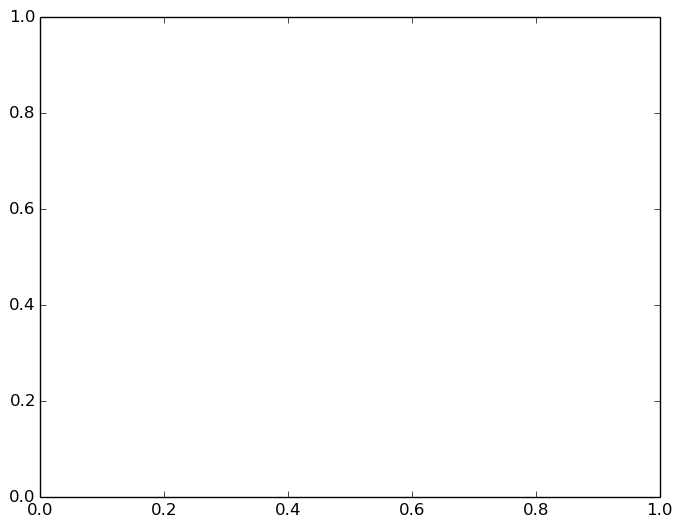

∫ (generic function with 2 methods)

In [19]:
function ∫(f::Function, a,b, Maximo, Minimo,puntos=10000) 
    inicio=f(a)
    final=f(b)
    L=b-a
    h=Maximo-Minimo
    Area_rectangulo=L*h
    x=rand(puntos)*L+a
    y=rand(puntos)*h+Minimo
    contador=0
    for i in 1:puntos
        if f(x[i])>y[i]>0 || f(x[i])<y[i]<0
            contador +=1
        end
    end
    return Area_rectangulo*(contador/puntos)
end
        

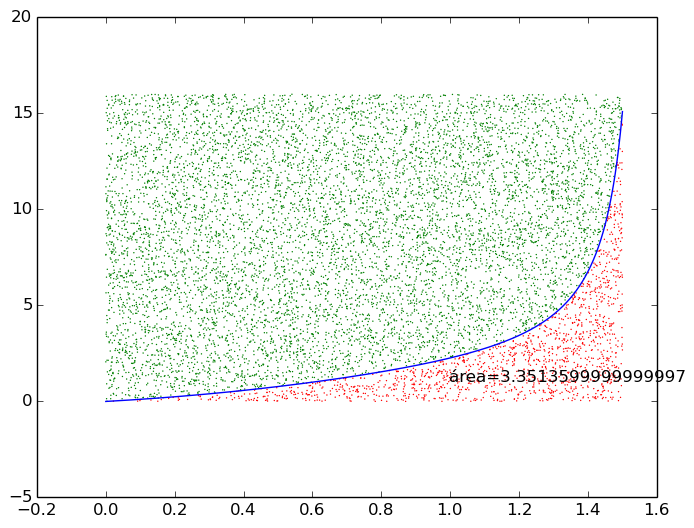

PyObject <matplotlib.text.Text object at 0x7f8d458a8990>

In [20]:
f(x)=sin(x).^2+tan(x)
x=0:0.001:1.5
plot(x,f(x))
xr=rand(10000)*1.5
yr=rand(10000)*16
xx=zeros(0)
yy=zeros(0)
xx2=zeros(0)
yy2=zeros(0)
for i in 1:10000
    if f(xr[i])>yr[i]>0 || f(xr[i])<yr[i]<0
        push!(xx,xr[i])
        push!(yy,yr[i])
    else
        push!(xx2,xr[i])
        push!(yy2,yr[i])  
    end
end
scatter(xx,yy, c="red", lw=0, s=1)
scatter(xx2,yy2, c="green", lw=0, s=1)

area=∫(f,0,1.5,16,0,100000)
text([1],[1],"área=$area")

Ahora bien, usando que la probabilidad de encontrarse en un estado dado es: $P(\sigma) = \frac{e^{-\beta \cdot H(\sigma)}}{Z_\beta}$, con $Z_\beta = \sum_\sigma e^{-\beta H(\sigma)}$  es posible resolver numéricamente el modelo de Ising en ND, para cualquier tipo de lattice usando un algoritmo de Monte-Carlo.  

# Proyectos de Billar

Hay muchas versiones de estos proyectos. Por poner unos ejemplos: 

1. Modelo de gas de Lorentz en altas dimensiones (billar en N-dimensiones)
- Modelo de materiales magnetoresistentes
- Modelos de quasicristales

La idea básica en todos estos modelos, es calcular colisiones de partículas puntuales con otros objetos. 

Sobre el primero ejemplo, hay varias preguntas abiertas que serían intersantes contestar. Por ejemplo, aún no se sabe si en altas dimensiones existe alguna configuración periódica, con obstáculos esféricos del mismo tamaño, en la cual no haya trayectorias libres infinitas. 

Una pregunta quizá más sencilla de responder (al menos numéricamente), es saber cómo es la distribución de vuelos libres, cuando los canales de un gas de Lorentz N-dimensional, son de dimensión $m<N-1$. 

El primer ejercicio en este caso es encontrar dónde colisiona una partícula en un billar de Sinai 2D, y con qué ángulo sale. El primer paso es entonces determinar donde colisiona. Para esto, ya tenemos la mitad del trabajo hecho con la función "tiempo_de_salida_cuadrado($x_1,\theta_1$)", sólo nos falta encontrar si no hay colisión antes con el disco central. Abajo la respuesta: 

In [21]:
function colision_disco(x,θ, r)
    v = [cos(θ); sin(θ)]
    x2 = x⋅x; v2 = v⋅v; xv = x⋅v; r2 = r^2
    b = xv/v2
    c = (x2/v2 - r2/v2)
    if b^2-c>0
        t= -b-sqrt(b^2-c)
        if t>0
            return t
        else
            return Inf
        end
    else
        return Inf
    end
end 

function colision_sinai(x,θ,r)
    t1 = colision_disco(x,θ,r)
    t2 = tiempo_de_salida_cuadrado(x,θ)
    return min(t1,t2)
end

colision_sinai (generic function with 1 method)

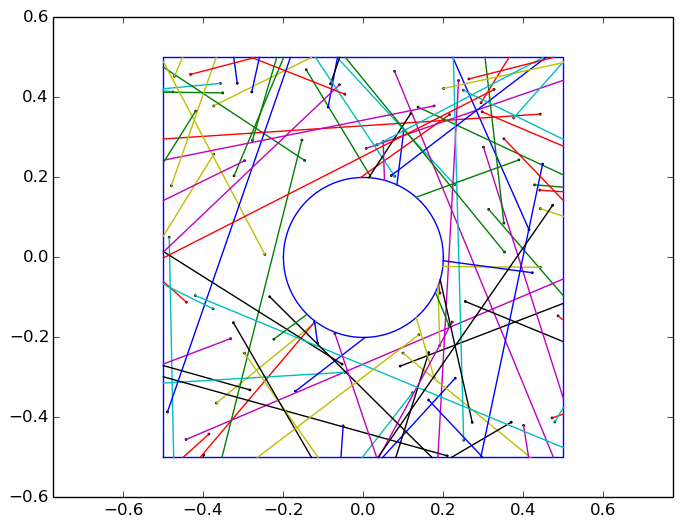

In [22]:
r = 0.2
plot([-0.5,-0.5,0.5,0.5,-0.5],[-0.5,0.5,0.5,-0.5,-0.5]) #cuadrado
xx= -r:0.001:r
plot(xx, sqrt(r^2 - xx.^2), color="blue" ) #parte superior del disco
plot(xx, -sqrt(r^2 - xx.^2), color="blue" ) #parte inferior del disco
axis("equal")
for i in 1:100
    x = rand(2)-[0.5,0.5] #tres condiciones iniciales en el cuadrado de lado 1, centrado en 0. 
    while norm(x)<r          # condición para que no inicie dentro del disco
        x = rand(2)-[0.5,0.5]
    end
    θ = 2*π*rand() #3 condiciones iniciales de dirección de movimiento. 
    t = colision_sinai(x,θ,r)
    v = [cos(θ), sin(θ)]
    xf = x + v*t 
    plot([x[1],xf[1]],[x[2],xf[2]])
#    text([x[1]],[x[2]], "t=$t")
    scatter([x[1]],[x[2]], s=1)
end

Hay que recordar que de aquí salen por lo menos 3 proyectos diferentes, sólo que el ejercicio inicial es el mismo para los 3. 

# Difusión de calor

El problema consiste en calcular la transmisión de energía (calor) de un punto en una red, hacia toda la red. 

El modelo consiste de una retícula formada por celdas cuadradas (cúbicas), con hoyos pequeños en las partedes. En cada celda hay un disco (esfera) con un radio mayor a $s/2$ donde $s$ es el tamaño de los hoyos en las paredes. De esta forma, los discos están atrapados, pero pueden colisionar con los discos de las cajas vecinas. ¿Cómo se trasmite entonces la energía?

El primer ejercicio consiste en programar 2 discos en 2 cajas diferentes, conectados entre sí por una ventana y encontrar cuándo colisionan estos 2 discos. 

El primer paso consiste en encontrar una función que determine si hay o no colisión en la trayectoria de 2 discos, cuyas posiciones iniciales son $x_1$ y $x_2$ y sus velocidades iniciales son $v_1$ y $v_2$. 

# Modelo de contagio

La idea es calcular el tiempo de primer encuentro entre 2 animales en 2 áreas que se enciman. 

El primer ejercicio entonces, consiste en estimar este tiempo para el caso unidimensional. Para esto, el primer paso es hacer un caminante aleatorio en 1 dimensión, con condiciones reflejantes en la frontera y "detectar" cuando se encuentre en una región determinada. 

In [23]:
function caminante_1d_reflejante(x,pasos,L,R)
    for i = 1:pasos
        n = round(Int,2*rand())
        x += (-1)^n * rand()            #pasos aleatorios, tanto en dirección, como en tamaño
        if x > L[2]
            exceso = x-L[2]
            x-=2*exceso
        elseif x < L[1]
            exceso = L[1]-x
            x+=2*exceso              #condiciones reflejantes
        end
    end
    if R[1] <= x <= R[2]
        return x, 1 # el 1 significa que está en la región R
    else 
        return x, 0
    end
end

caminante_1d_reflejante (generic function with 1 method)

In [24]:
caminante_1d_reflejante(1,100,[0,100], [0,8])

(5.674461398200335,1)

Abajo pueden correr la simulación en tiempo real. 

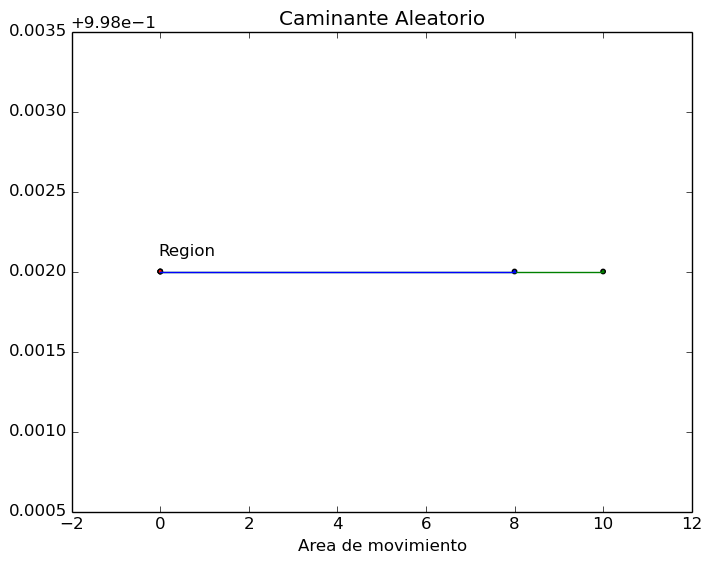

In [25]:
myfig1 = figure()

function myplot1(data)
        withfig(myfig1) do
        Pos=data[1]
        Area_de_movimiento=data[2]
        Region=data[3]
        xlabel("Area de movimiento")
        title("Caminante Aleatorio")
        scatter(Area_de_movimiento, ones(2), s=10, c="green")
        plot(Area_de_movimiento,ones(2),color="green")
        scatter(Region, ones(2), s=10, c="blue")
        text([Region[1]],[1.0001], "Region")
        plot(Region, ones(2), color="blue")
        scatter(Pos, [1], s=10, c="red")
        end
end
myinput1=Signal(Array[[0],[0,10],[0,8]])
map(myplot1, myinput1)

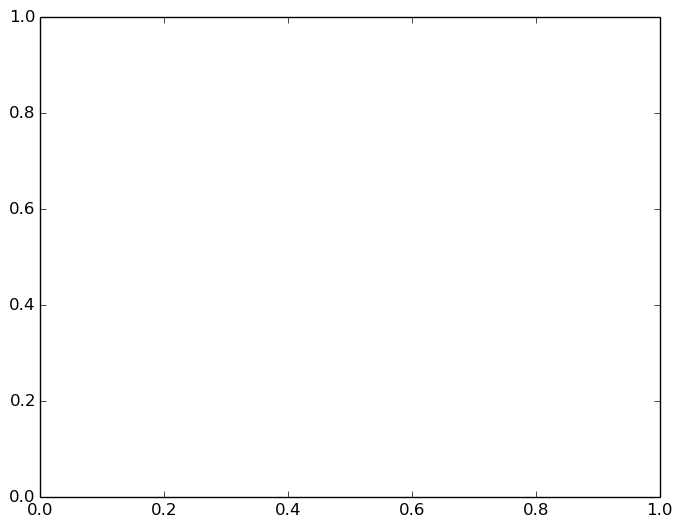

el infectado está en la región azul después de 35 pasos


In [30]:
x=9
test = 0
i=0
while test != 1
    x,test=caminante_1d_reflejante(x,1,[0,10], [0,8])
    i += 1
    push!(myinput1,Array[[x],[0,10],[0,8]])
    if test==1
        println("el infectado está en la región azul después de $i pasos")
    end
end

# Simulaciones con dinámica Browniana

Las simulaciones con dinámica browniana son particularmente útiles para simular sistemas coloidales. Los sistemas coloidales son de particular interes hoy en día, puesto que se pueden atrapar algunas partículas mediante potenciales armónicos generados con láseres y con esto controlar el comportamiento del material-fluido. 

Un ejemplo interesante de estos sistemas, es estudiar un coloide bidispersivo en medio de 2 placas y mover algunas partículas pegadas a las plácas, en alguna dirección para generar fuerzas de corte. Esto puede producir efectos interesantes a nivel global, por ejemplo, que pase de estado "gelatinoso" a estado fluido o a la inversa. 

El proyecto es precisamente este ejemplo. 

El primer ejercicio consiste en hacer una función que pueda simular el comportamiento de una partícula Browniana de movimiento libre, al resolver la ecuación de Langevin en 3D, para un potencial nulo. O sea, resolver esta ec: 

$ \dot{X}(t) = - \nabla U(X)/\gamma + \sqrt{2 D} R(t). $

$R(t)$ es un proceso Gausiano estacionario con promedio 0 (una función aleatoria gaussiana), D es el coeficiente de difusión, que según la relación de Einstein es: $D = k_B T/\gamma$, $\gamma$ es el coeficiente de fricción del material y finalmente $U(x)$ es el potencial al que está expuesta la partícula. 

Por cierto, esta clase de simulaciones son también útiles para simular algunos animales, autoensambles de partículas y otros fenómenos complejos.

(pueden ver el artículo de wikipedia al respecto)

# Problemas de Percolación